# Alzheimer's disease dataset analysis and comparison

Obtaining and comparing gene sets thought to be compromised in Alzheimer's disease patients. 

In [1]:
# Importing packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import string


### Calculating difference between matrices using orignal data set

In [109]:
# Loading samples - Alzheimer's disease
ADsamples_Upenn_df = pd.read_table('AD_Upenn_prot.txt',index_col=0)  # Upenn data
ADsamples_Banner_df = pd.read_table('AD_Banner_prot.txt',index_col=0)  # Banner data
# AD_synap_plasticity = pd.read_csv('GO_REGULATION_OF_SYNAPTIC_PLASTICITY.csv', index_col = 0)

# AD_synap_plasticity
# ADsamples_Upenn_df
# ADsamples_Banner_df

In [3]:
# Importing genes from GO_REGULATION_OF_SYNAPTIC_PLASTICITY and creating list of genes

import csv

# placing all genes into a list of lists
with open('GO_REGULATION_OF_SYNAPTIC_PLASTICITY.csv', 'r') as f:
    reader = csv.reader(f)
    gene_list_raw = list(reader)

# creating list of genes
gene_list_SP = []
for gene in gene_list_raw:
    gene_list_SP.append(gene[0]) 

In [85]:
# Taking intersection of all gene lists

# Lists from Alzheimer's data sets 
ADsamples_UPenn_gene_list = list(ADsamples_Upenn_df.dropna(axis='columns').columns.values)
ADsamples_Banner_gene_list = list(ADsamples_Banner_df.dropna(axis='columns').columns.values)

# taking intersection of lists - dropping NaN values
AD_genes_SP_intersection = list(set(gene_list_SP).intersection(ADsamples_UPenn_gene_list, ADsamples_Banner_gene_list))

print('Number of genes in intersection: ',len(AD_genes_SP_intersection))

Number of genes in intersection:  44


In [146]:
# Intersections - dropping NaN values

ADsamples_UPenn_gene_intersec_df = ADsamples_Upenn_df[AD_genes_SP_intersection]
ADsamples_Banner_gene_intersec_df = ADsamples_Banner_df[AD_genes_SP_intersection]

# number of NaN values
print('Number of NaN values: ',ADsamples_UPenn_gene_intersec_df.isnull().sum().sum())
print('Number of NaN values: ',ADsamples_Banner_gene_intersec_df.isnull().sum().sum())
print('Shape of UPenn data: ',ADsamples_UPenn_gene_intersec_df.shape)
print('Shape of Banner data: ',ADsamples_Banner_gene_intersec_df.shape )

# number of samples x genes with NaN values
# print(ADsamples_UPenn_gene_intersec_df.loc[:, ADsamples_UPenn_gene_intersec_df.isna().any()].shape)
# print(ADsamples_Banner_gene_intersec_df.loc[:, ADsamples_Banner_gene_intersec_df.isna().any()].shape)

# ADsamples_UPenn_gene_intersec_final_df = ADsamples_UPenn_gene_intersec_df.dropna(axis='columns')
# ADsamples_Banner_gene_intersec_final_df = ADsamples_Banner_gene_intersec_df.dropna(axis='columns')

Number of NaN values:  0
Number of NaN values:  0
Shape of UPenn data:  (24, 44)
Shape of Banner data:  (225, 44)


In [89]:
# Checking to make sure gene orders are the same
ADsample_UPenn_gene_order_check = list(ADsamples_UPenn_gene_intersec_df.columns.values)
ADsamples_Banner_gene_order_check = list(ADsamples_Banner_gene_intersec_df.columns.values)


print('Are the genes and gene order in both data sets the same: ',ADsample_UPenn_gene_order_check == ADsamples_Banner_gene_order_check)

Are the genes and gene order in both data sets the same:  True


In [92]:
# Transposing data matrices and obtaining covariance matrix
ADsamples_UPenn_gene_intersec_df_transpose = ADsamples_UPenn_gene_intersec_df.transpose()
ADsamples_Banner_gene_intersec_df_transpose = ADsamples_Banner_gene_intersec_df.transpose()

# calculating covariance matrix
ADsamples_UPenn_gene_intersec_cov = np.cov(ADsamples_UPenn_gene_intersec_df_transpose)
ADsamples_Banner_gene_intersec_cov = np.cov(ADsamples_Banner_gene_intersec_df_transpose)

# making sure matrices are gene x gene 
print('Shape of gene x gene covariance matrix (UPenn): ',ADsamples_UPenn_gene_intersec_cov.shape)
print('Shape of gene x gene covariance matrix (Banner): ',ADsamples_Banner_gene_intersec_cov.shape)



Shape of gene x gene covariance matrix (UPenn):  (44, 44)
Shape of gene x gene covariance matrix (Banner):  (44, 44)


In [98]:
# Calculating Euclidean norm

euclidean_norm_original = np.linalg.norm(ADsamples_UPenn_gene_intersec_cov - ADsamples_Banner_gene_intersec_cov)
print('Euclidean norm of original data set: ',euclidean_norm_original)

Euclidean norm of original data set:  3.229698172767606e+21


### Calculating difference between datasets with permuted samples

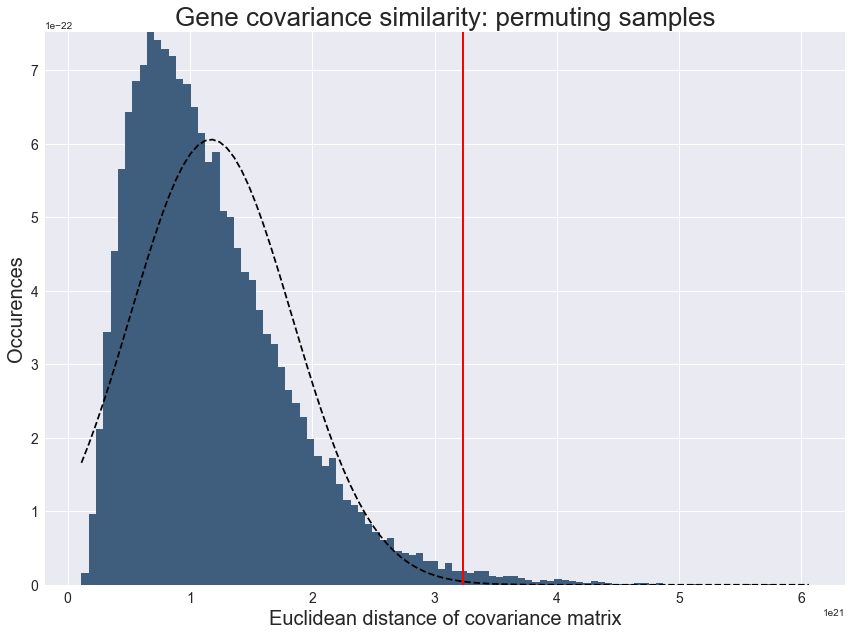

z-score for euclidean distance of non-permuted samples:  3.1245596767403203


In [271]:
# Shuffling samples and recalculating matrix similarities
import seaborn as sns  # for nicer graphics

# list where shuffled euclidean distances will be added
euclidean_distances_shuffle_samples = []

# loop that shuffles samples
for index in range(0,50000):
    # concatenating dataframes so we can randomly samples from whole pool
    ADsamples_concat_frames_temp = [ADsamples_UPenn_gene_intersec_df, ADsamples_Banner_gene_intersec_df] 
    ADsamples_concat_df_temp = pd.concat(ADsamples_concat_frames_temp)

    # shuffling samples -- 24 samples goes to first matrix; 225 goes to second matrix
    ADsamples_permute_temp = ADsamples_concat_df_temp.sample(n = 249)
    ADsamples_UPenn_permute_transpose_temp = ADsamples_permute_temp[0:24].transpose()
    ADsamples_Banner_permute_transpose_temp = ADsamples_permute_temp[24:].transpose()

    # calculating covariance matrices
    ADsamples_Upenn_permute_cov_temp = np.cov(ADsamples_UPenn_permute_transpose_temp)
    ADsamples_Banner_permute_cov_temp = np.cov(ADsamples_Banner_permute_transpose_temp)

    # calculating euclidean distance
    euclidean_norm_original_temp = np.linalg.norm(ADsamples_Upenn_permute_cov_temp - ADsamples_Banner_permute_cov_temp)
    # placing calculated euclidean distance into list
    euclidean_distances_shuffle_samples.append(euclidean_norm_original_temp)

# placing value from non-permuted matrices into list
original_value = euclidean_norm_original
euclidean_distances_shuffle_samples.append(original_value)

# plotting histogram
num_bins = 50

fig, ax = plt.subplots(figsize=(12, 9))
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)

ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left() 

plt.xticks(fontsize=14)  
plt.yticks(fontsize=14) 

plt.xlabel("Euclidean distance of covariance matrix", fontsize=20)  
plt.ylabel("Occurences", fontsize=20)

plt.title('Gene covariance similarity: permuting samples', fontsize=26)


# histogram of the data
n, bins, patches = ax.hist(euclidean_distances_shuffle_samples, 100, density=1,color="#3F5D7D")

# adding'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * np.std(euclidean_distances_shuffle_samples))) *
     np.exp(-0.5 * (1 / np.std(euclidean_distances_shuffle_samples) * (bins - np.mean(euclidean_distances_shuffle_samples)))**2))
ax.plot(bins, y, '--',color = '#000000')

# creating vertical line showing where original data lies on distribution
plt.axvline(euclidean_norm_original, color='r', linestyle='-', linewidth=2)

fig.tight_layout()
plt.show()


z_score = (euclidean_norm_original - np.mean(euclidean_distances_shuffle_samples)) / np.std(euclidean_distances_shuffle_samples)
print('z-score for euclidean distance of non-permuted samples: ', z_score)

### Calculating difference between datasets with randomly selected genes

In [273]:
# creating list of genes without any associated NaN values
ADsamples_UPenn_gene_list_gpermute = list(ADsamples_Upenn_df.dropna(axis='columns').columns.values)
ADsamples_Banner_gene_list_gpermute = list(ADsamples_Banner_df.dropna(axis='columns').columns.values)

# finding intersection of genes without NaN values
genes_permute = set(ADsamples_UPenn_gene_list_gpermute).intersection(ADsamples_Banner_gene_list_gpermute)



1663